<a href="https://colab.research.google.com/github/Amalbh1/Prediction-of-Product-Sales/blob/master/Project1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
- Author: Amal Benabdelhafidh​

## "Project Overview"
## "Load and Inspect Data"
## "Clean Data"
## "Exploratory Data Analysis"
## "Feature Inspection"

#Loading Data

In [2]:
#mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# import pandas
import pandas as pd
# save file path
df_project= pd.read_csv("/content/sales_predictions_20231.csv")


In [8]:
pd.read_csv("/content/sales_predictions_20231.csv")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
df_project.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning


In [11]:
df_project.select_dtypes(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [13]:
df_project['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
# Remove  the "Tier" from fare column by replacing it with nothing
df_project['Outlet_Location_Type'] = df_project['Outlet_Location_Type'].str.replace('Tier', '')
# Check the .value_counts to confirm the change
df_project['Outlet_Location_Type'].value_counts()

 3    3350
 2    2785
 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
df_project['Outlet_Location_Type'] = df_project['Outlet_Location_Type'].astype(int)

In [16]:
df_project.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052


In [17]:
#checking for Duplicates
duplicated_rows = df_project.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
num_duplicate_rows = duplicated_rows.sum()
print(num_duplicate_rows)

0


In [18]:
# Use .nunqiue() to get # of unique values for each column and save as a variable.
unique_values_per_column = df_project.nunique()
print(unique_values_per_column)

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [19]:
# Use the result to determine if any of the columns have 100% unique values.
columns_with_100_percent_unique = unique_values_per_column[unique_values_per_column == len(df_project)]

# Print columns with 100% unique values
if len(columns_with_100_percent_unique) > 0:
    print("Columns with 100% unique values:", columns_with_100_percent_unique.index.tolist())
else:
    print("No columns have 100% unique values.")

No columns have 100% unique values.


In [20]:
# Get the number of null values for all columns and save as a variable
null_values_per_column = df_project.isnull().sum()
print(null_values_per_column)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [21]:
# Use this result to calculate the percentage of null values for each column.
null_percentage_per_column = (null_values_per_column / len(df_project)) * 100
print(null_percentage_per_column)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [22]:
import missingno as msno
import matplotlib.pyplot as plt


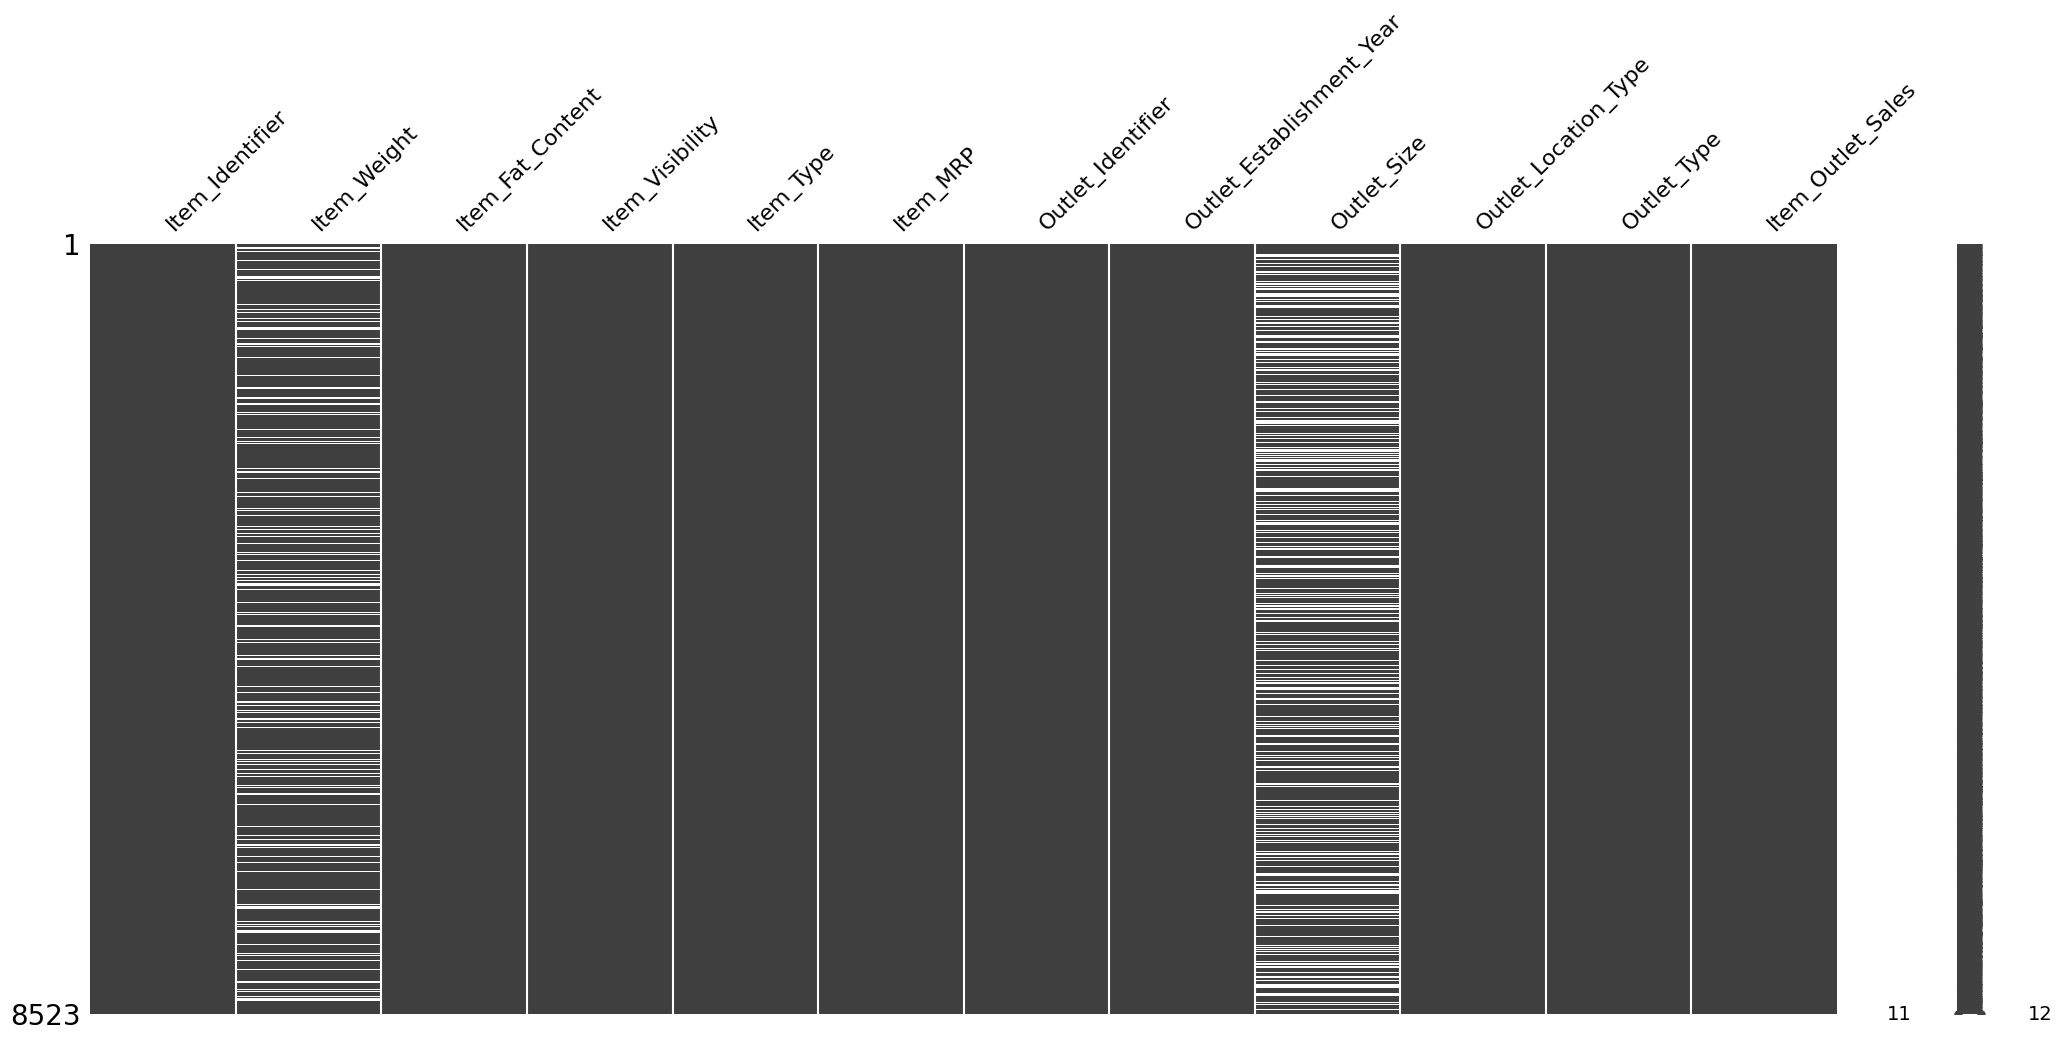

In [23]:
msno.matrix(df_project)
plt.show()

In [24]:
# save list of categorical column name. (Hint: select_dtypes)
categorical_columns = df_project.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


In [25]:
# use the list of cat columns to fill null values with MISSING
df_project[categorical_columns] = df_project[categorical_columns].fillna("MISSING")
df_project.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052


In [26]:
# save list of numeric column names (Hint: select_dtypes)
numeric_columns = df_project.select_dtypes(include=['int', 'float']).columns.tolist()
print(numeric_columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Item_Outlet_Sales']


In [27]:
# use the list of num columns to fill null values with -1
df_project[numeric_columns] = df_project[numeric_columns].fillna(-1)


In [28]:
# Confirm no more nulls using Pandas
null_values_per_column = df_project.isnull().sum()
print(null_values_per_column)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


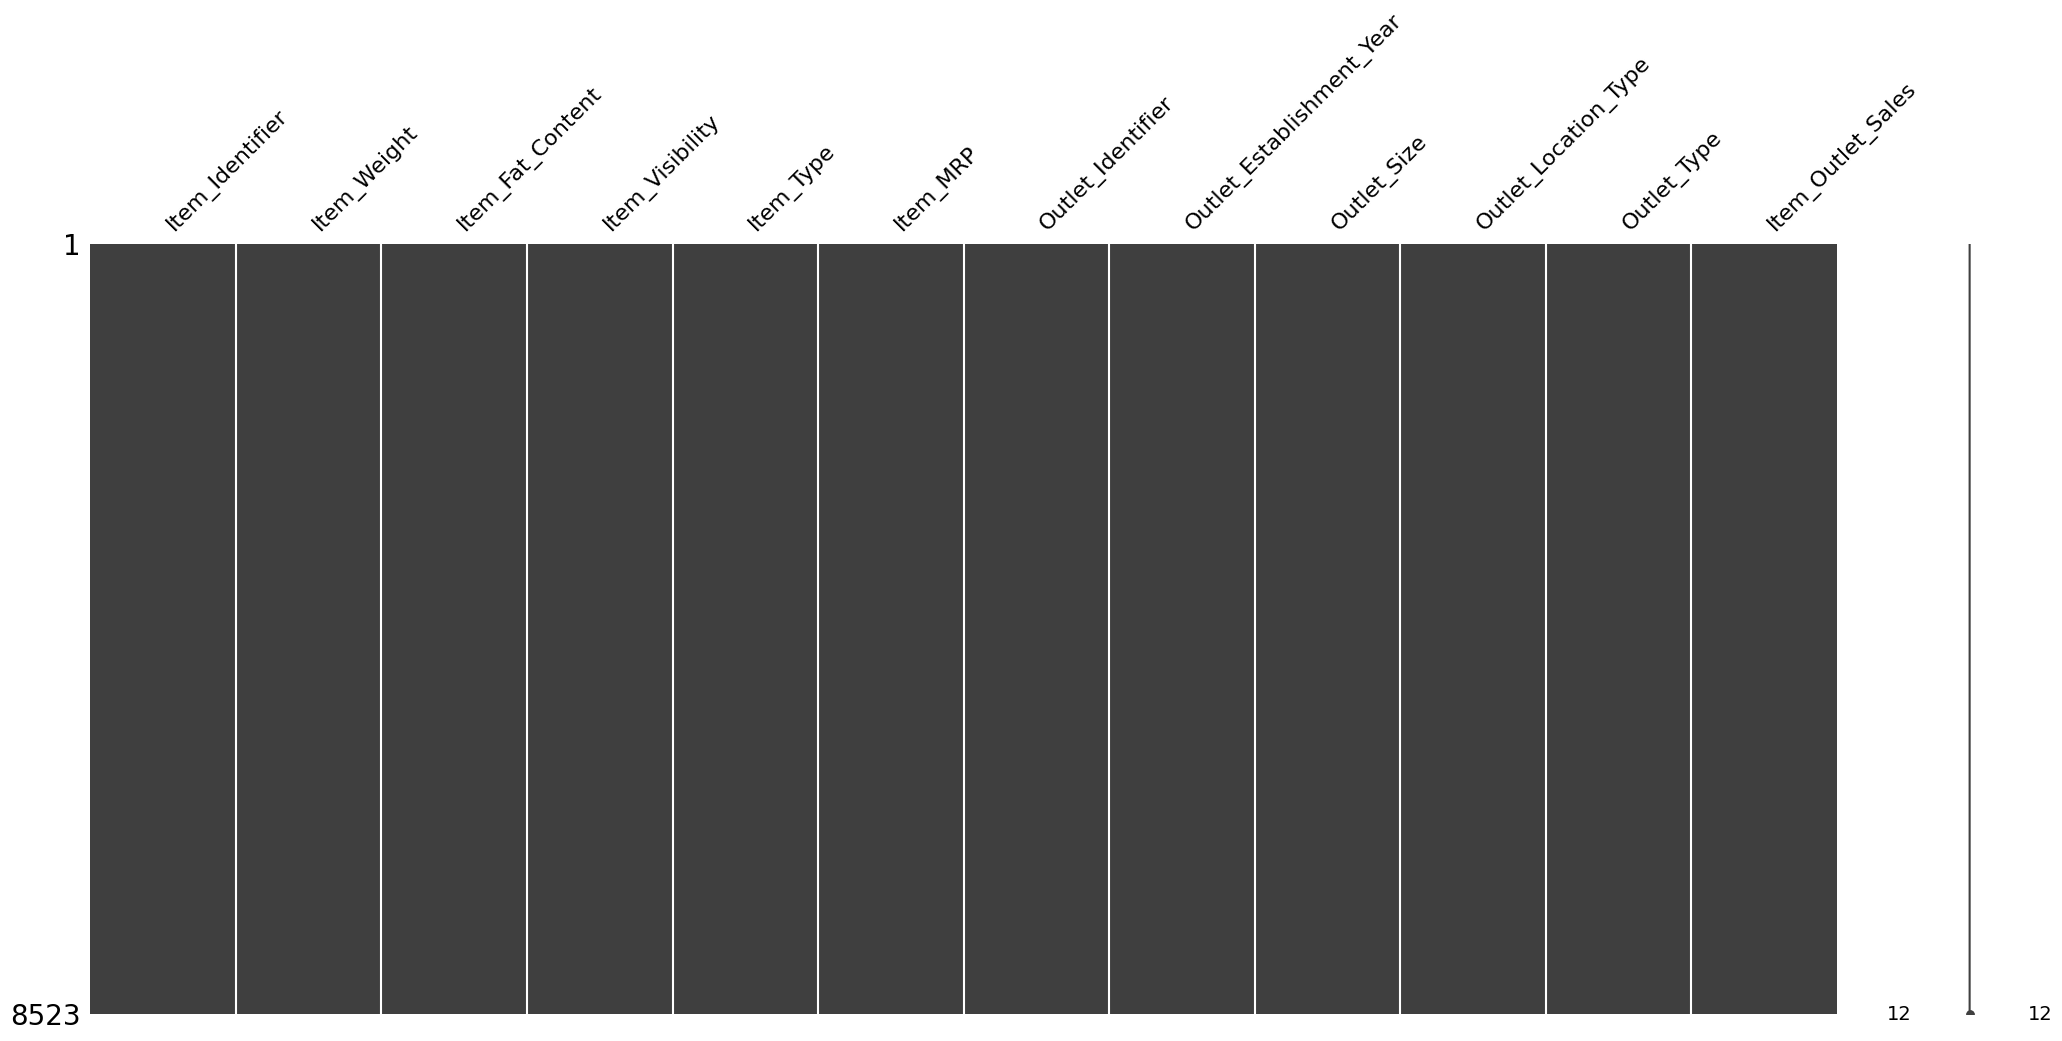

In [29]:
# Confirm no more nulls using using missingno
msno.matrix(df_project)
plt.show()

In [30]:
# Save a list of object columns (Hint: select_dtypes)
categorical_columns = df_project.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


In [31]:
# Check the nunique for just the object cols
unique_values_categorical = df_project[categorical_columns].nunique()

# Display the number of unique values for each categorical column
print(unique_values_categorical)

Item_Identifier      1559
Item_Fat_Content        5
Item_Type              16
Outlet_Identifier      10
Outlet_Size             4
Outlet_Type             4
dtype: int64


In [32]:
# Remake the list of string columns (after dropping previous cols)
string_columns = df_project.select_dtypes(include=['object']).columns.tolist()

# loop through the list of string columns
for col in string_columns:

    print(f"Processing column: {col}")
  # print the value counts for the column
    print(f"Value counts for column '{col}':")
    print(df_project[col].value_counts())

  # Print an empty line for readability
    print()

Processing column: Item_Identifier
Value counts for column 'Item_Identifier':
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Processing column: Item_Fat_Content
Value counts for column 'Item_Fat_Content':
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Processing column: Item_Type
Value counts for column 'Item_Type':
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                  

In [33]:
#fix inconsistencies for Item_Fat_Content
df_project['Item_Fat_Content'] = df_project['Item_Fat_Content'].replace('LF', 'Low Fat')

In [34]:
df_project['Item_Fat_Content'] = df_project['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [35]:
df_project['Item_Fat_Content'] = df_project['Item_Fat_Content'].replace('reg', 'Regular')

In [36]:
df_project['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
#save file
import os

# Define the folder path and filename
folder_path = "/content/drive/MyDrive/Amal Assignments For  DS Bootcamp_Week1"
filename = "Project1part2.csv"

# Combine the folder path and filename to create the full file path
fpath = os.path.join(folder_path, filename)

# Use to_csv to save the DataFrame using the filename
df_project.to_csv(fpath, index=False)

# Print the filepath to confirm
print("File saved to:", fpath)


File saved to: /content/drive/MyDrive/Amal Assignments For  DS Bootcamp_Week1/Project1part2.csv


In [38]:
#confirm
# Read in the new .csv file with Pandas
df_project = pd.read_csv(fpath)

# Display the info summary
print("Info summary:")
print(df_project.info())

# Display the first 5 rows
print("\nFirst 5 rows:")
print(df_project.head())

Info summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB
None

First 5 rows:
  Item_Iden

#Data Visualization



import the required packages




In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

## Explore Correlation

In [40]:
correlations = df_project.corr()
print("Correlation Matrix:")
print(correlations)

Correlation Matrix:
                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.079371  0.022367   
Item_Visibility              -0.079371         1.000000 -0.001315   
Item_MRP                      0.022367        -0.001315  1.000000   
Outlet_Establishment_Year     0.537341        -0.074834  0.005020   
Outlet_Location_Type         -0.069433        -0.028099  0.000232   
Item_Outlet_Sales            -0.055461        -0.128625  0.567574   

                           Outlet_Establishment_Year  Outlet_Location_Type  \
Item_Weight                                 0.537341             -0.069433   
Item_Visibility                            -0.074834             -0.028099   
Item_MRP                                    0.005020              0.000232   
Outlet_Establishment_Year                   1.000000             -0.089216   
Outlet_Location_Type                       -0.089216              1.000000   
Item_Outlet_Sales           

<ipython-input-40-936d859bd0ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_project.corr()


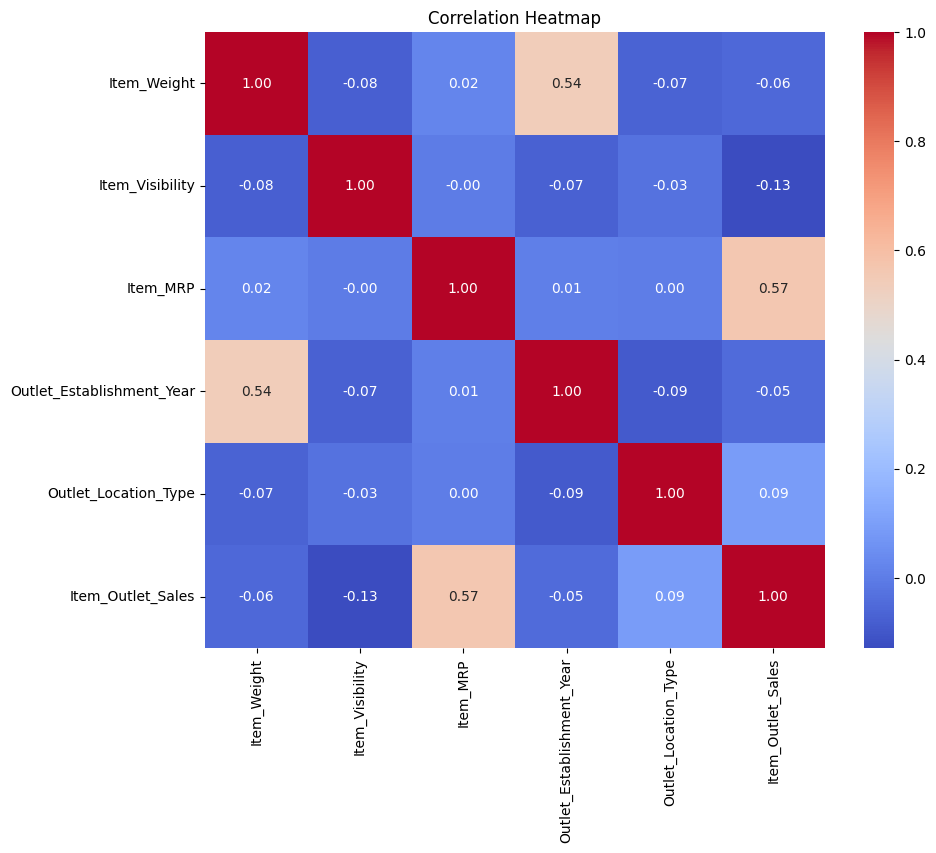

In [41]:
#heatmap using the correlations from above
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

relatively high positive correlation between
- Outlet establishment year and Item weight (0.54)
- Item MRP and Item_outlet_Sales (0.57 c)

relatively moderate negative correlation between :
Item visibility and Item outlet sales -0.13

## Histograms for the numerical features

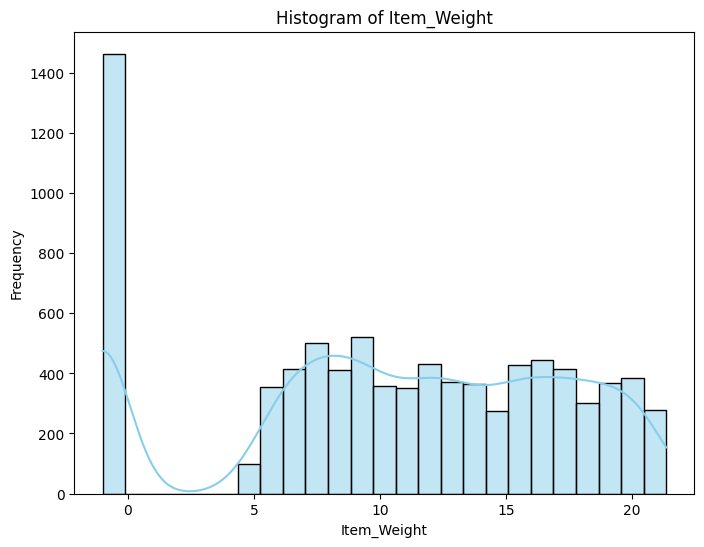

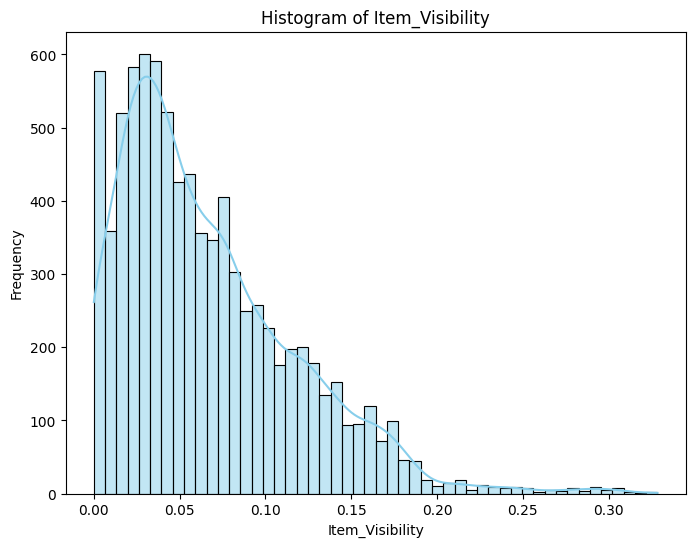

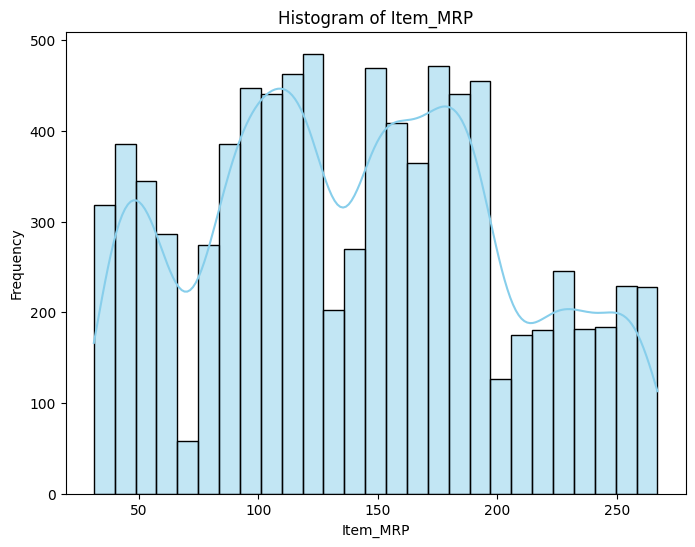

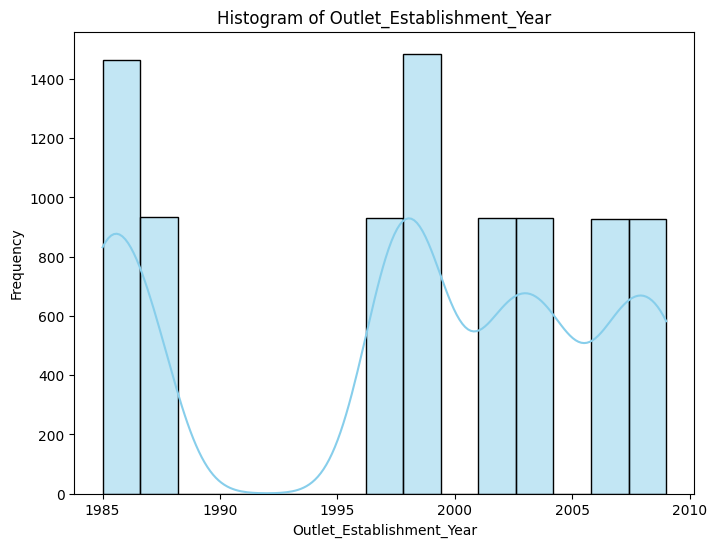

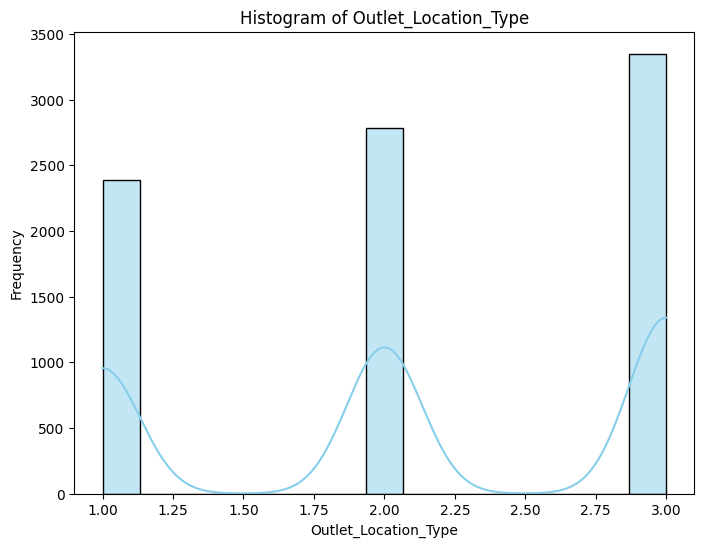

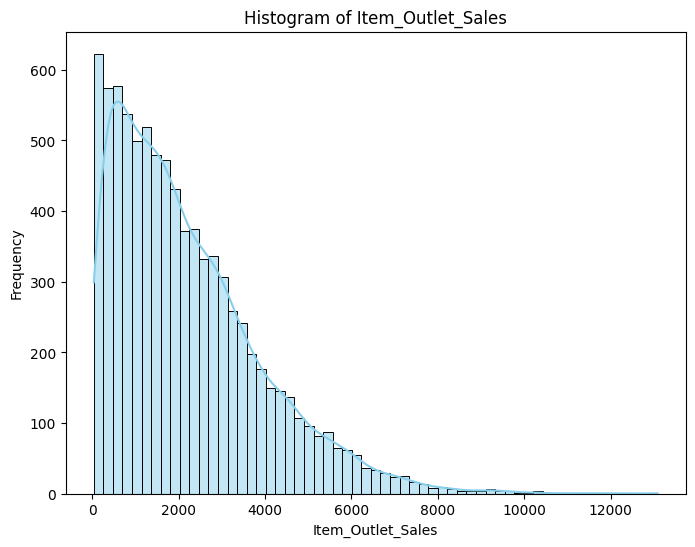

In [45]:
numerical_features = df_project.select_dtypes(include=['float64', 'int64'])

# Plot histograms for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_project[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##Boxplots to view statistical summaries of numerical features in your dataset.


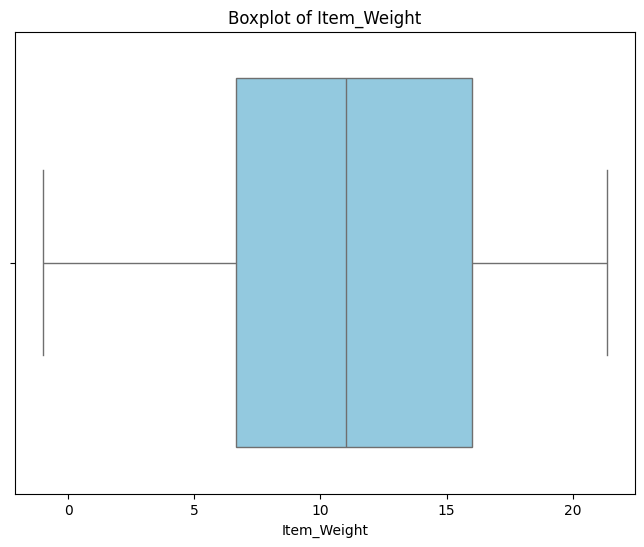

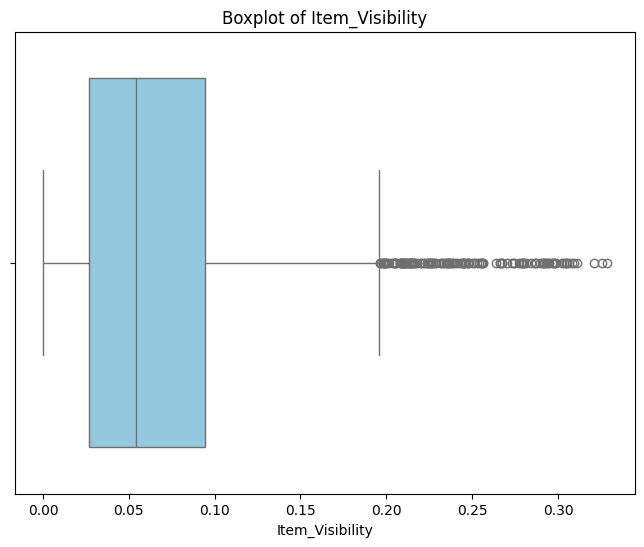

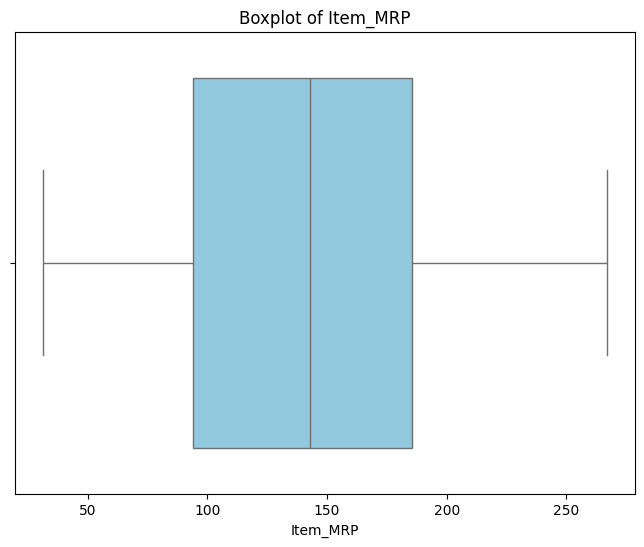

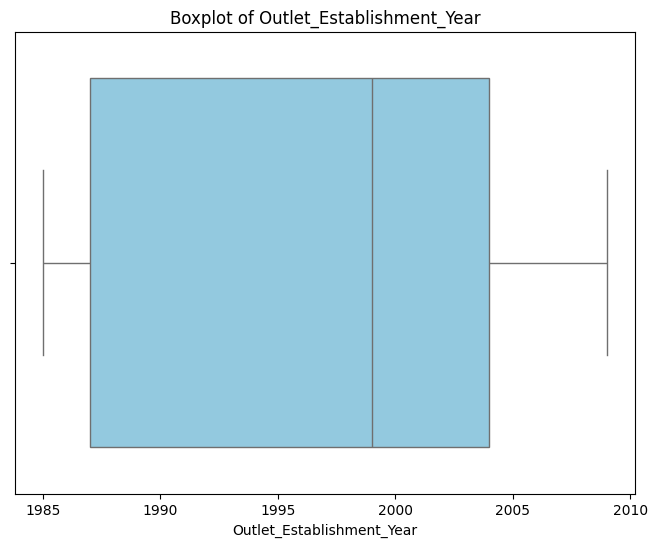

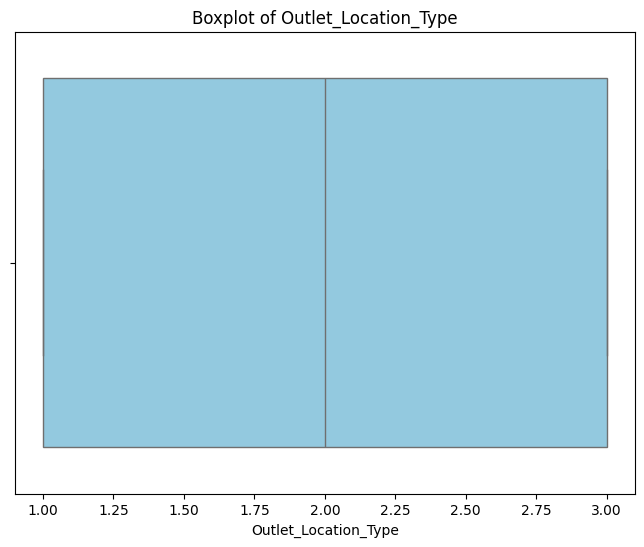

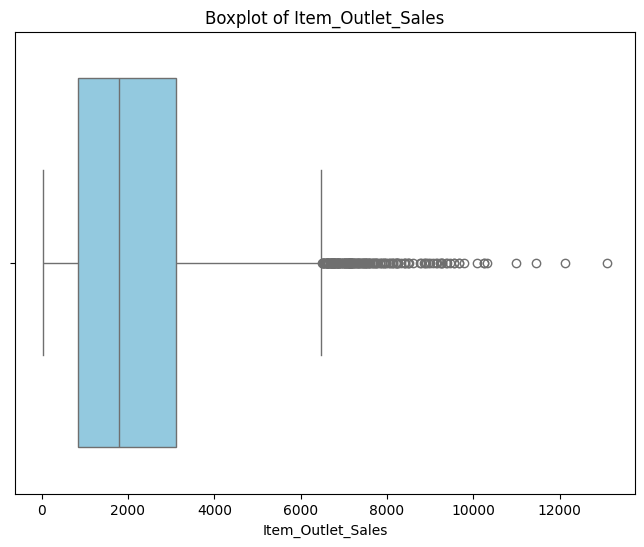

In [46]:
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_project[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

##Countplots to view the frequency of each class of categorial features in your dataset.


In [52]:
df_project = df_project.drop('Item_Identifier', axis=1)

<ipython-input-53-1b78270ccb4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_project, palette='Set2')


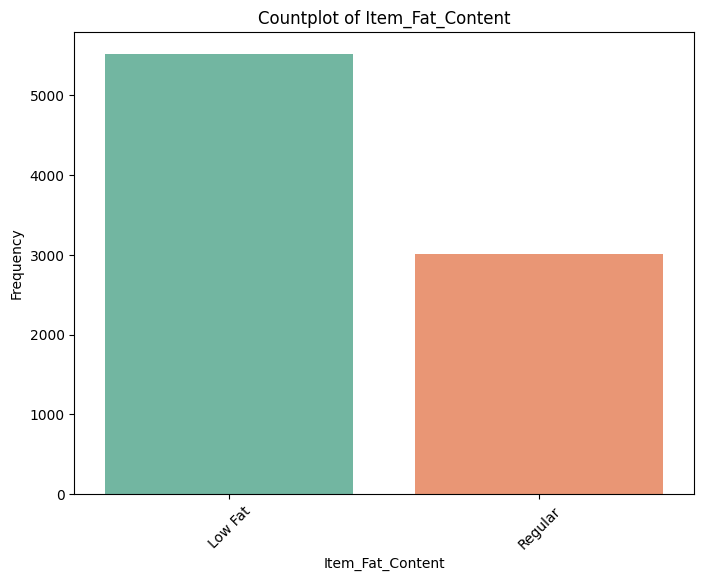

<ipython-input-53-1b78270ccb4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_project, palette='Set2')


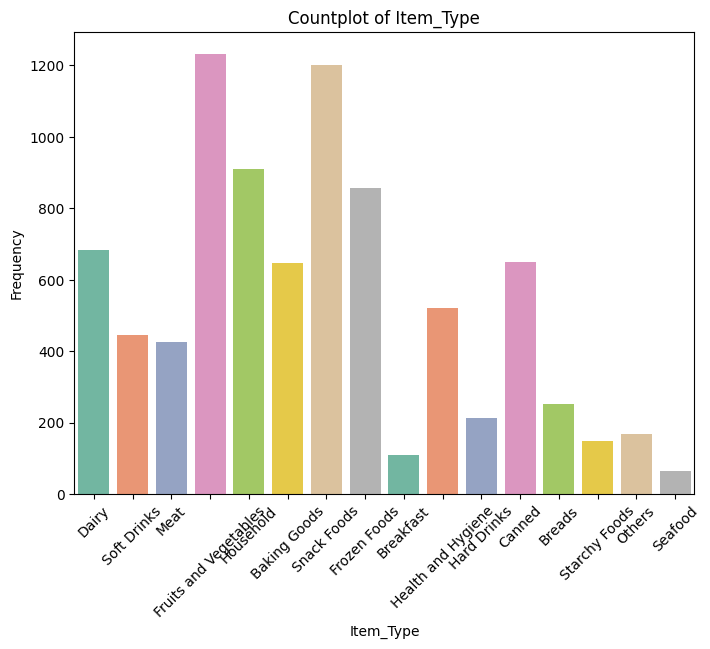

<ipython-input-53-1b78270ccb4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_project, palette='Set2')


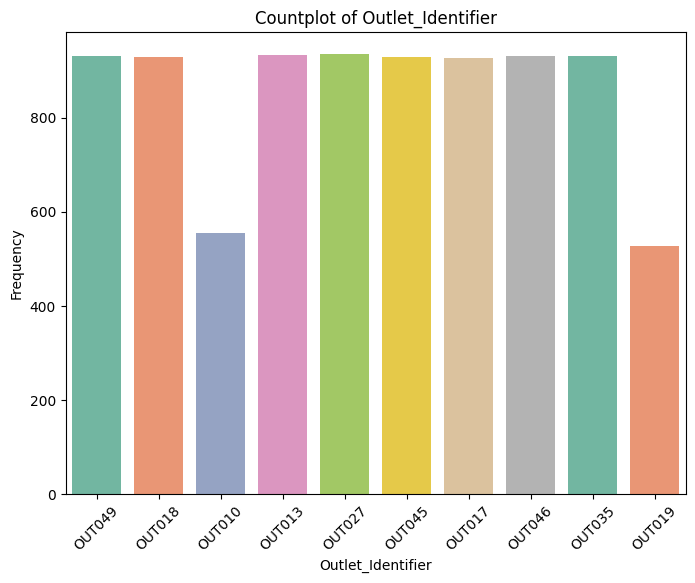

<ipython-input-53-1b78270ccb4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_project, palette='Set2')


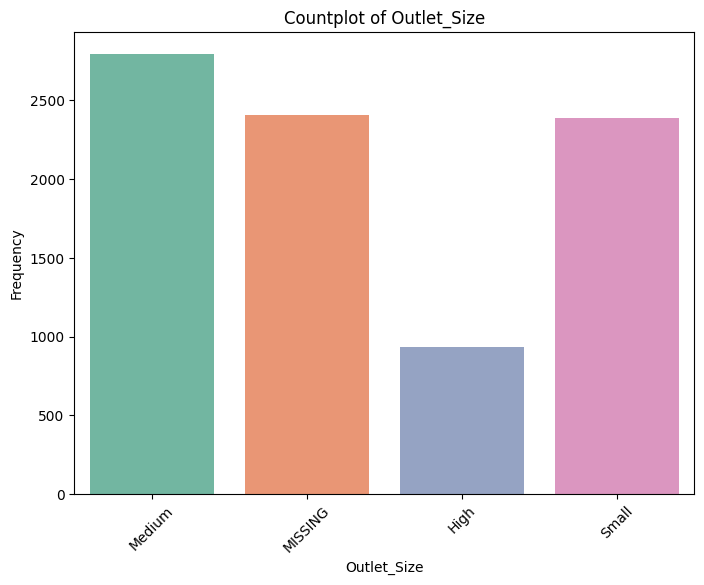

<ipython-input-53-1b78270ccb4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_project, palette='Set2')


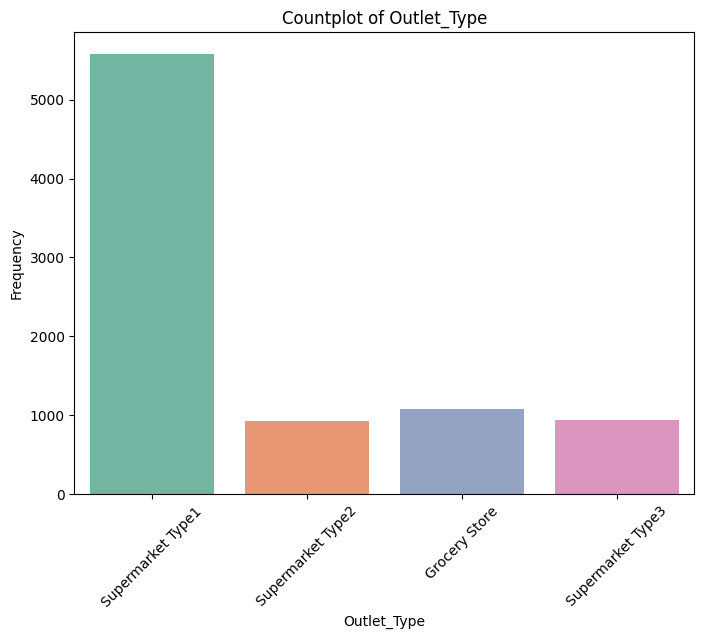

In [53]:
categorical_features = df_project.select_dtypes(include=['object'])

# Plot countplots for each categorical feature
for column in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_project, palette='Set2')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()